## Project: Data Wrangling using Pandas and Regex

In this project you are asked __to implement__ and __perform a unit testing__ for a series of Python functions (Q1-Q13) that are typically required during the ***data wrangling*** phase of the end-to-end data science pipeline. A subset of unit testing functions is provided for you. You are expected to write unit testing for all the remaining functions.

__Data Wrangling consists of the following main steps:__

* Data Acquisition
* Data Cleansing
* Data Understanding: Basics
* Data Manipulation
  
  
__1. Data Acquisition Objectives__

* Question 1: How to import multiples files for storage and access? (store filenames in array)
* Question 2: How to import data in different formats? (read_excel, read_csv)
* Question 2: How are they read into by pandas? (DataFrame)
* Question 4: How to have a peek at the data after import? (head/tail)

__2. Data Cleansing Objectives__

* Question 5: Check attributes of each file
* Question 5: Identify data types
* Question 5: Apply coercion if applicable
* Question 5: Check for NA/missing data
* Question 6: Remove/replace corrupt data
* Question 6: Identify duplicate data
* Question 6: Check for corrupt/incorrect data  

* Check for data consistency (e.g. GPA cannot be less than 0)
* Identifying and removing outliers

__3. Data Understanding Objectives__

* Question 7: Basic Summary Statistics
* Question 9: Dimensionality

__4. Data Manipulation Objectives__

* Question 11: Merge/Concatenate DataFrame
* Question 11: Mapping to create a new attribute
* Question 11: Incorporate the use of multiple functions
* Question 12: Filter to subset the data
* Question 13: Discretize data 
  
  
__Regular Expressions:__ *Regular expressions are used in conjunction with other preprocessing steps for matching/parsing patterns.*

* Questions 2/5/6: Filter to subset the dataUse regular expressions to find/match specific content
* Question 6: Filter to subset the dataString manipulation via. substring and replace methods

## Install Required Packages

If you do not have Anaconda installed, then you may need to install the following packages using the following commands (Note: If you have Anaconda installed, then you already have Pandas and `regex`):

> pip3 install pandas  
  
> pip3 install regex

## INSTRUCTIONS: In all the functions, remove the `pass` statement and write your code.

In [77]:
import pandas as pd
import re
import glob
import copy
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### __Question 1: Write a function to import all excel file names into a list.__

_Hint: Use the glob module._

In [78]:
def Q1_function():
    """
    :type : None
    :rtype: List[String]
    """
    # TYPE YOUR CODE HERE
    files = glob.glob('data_raw/*.xlsx')
    fnames = list(map(lambda filename: filename.rsplit("\\")[-1], files))
    return fnames

# Call the function and print the result. This result is used in subsequent questions.
filenames = Q1_function()
print(filenames)

['Python-QUIZ Coercion (6 min.)-grades.xlsx', 'Python-QUIZ Conditionals (6 min.)-grades.xlsx', 'Python-QUIZ Dictionaries (10 min.)-grades.xlsx', 'Python-QUIZ Exceptions (10 min.)-grades.xlsx', 'Python-QUIZ Functions (18 min.)-grades.xlsx', 'Python-QUIZ Iterations (6 min.)-grades.xlsx', 'Python-QUIZ Lists (10 min.)-grades.xlsx', 'Python-QUIZ Sets (7 min)-grades.xlsx', 'Python-QUIZ Strings (5 min.)-grades.xlsx', 'Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', 'Python-QUIZ Tuples (10 min.)-grades.xlsx']


### __Question 2: Write a function to return an excel file based on a given string. *(The string is defined for you)*__  
*Hints: Use the following.*
* Regex 're.search' function.
* Pandas function 'read_excel'

In [79]:
def Q2_function(files, s):
    """
    :type : List[String], String
    :rtype: String
    """
    # Escaping paranthesis
    s = re.sub('([\(\)\[\]\{\}])', r'\\\1', s)
    for file in files:
        if re.search(s, file):               # Return first found match
            return file  
    return ""

# Call the function and print the result. Use this to check the correctness of your code and for debugging.
file = Q2_function(filenames, s = "Lists")
print(file)

Python-QUIZ Lists (10 min.)-grades.xlsx


### __Question 3: Write a function to load the "Functions" excel file into a Pandas DataFrame.__  
*Hint: Remember you have executed functions in Questions 1 and 2. Try using them here. You can save some coding time!*  
* Use the result from Question 1.
* Use the function written in Question 2.
* Use the Pandas function 'read_excel' to import an excel file.

In [80]:
def Q3_function(files, s):
    """
    :type : List[String], String
    :rtype: Pandas DataFrame
    """
    # TYPE YOUR CODE HERE
    filename = Q2_function(files, s)   
    file = 'data_raw/' + filename
    return pd.read_excel(file)
    
# Call the function and print the result. This result is used in subsequent questions.
functions_df = Q3_function(filenames, s = "Functions")
# print(functions_df)
print(functions_df)

       State                  Started on                   Completed  \
0   Finished    February 5 2018  3:19 PM    February 5 2018  3:34 PM   
1   Finished    February 4 2018  4:01 PM    February 4 2018  4:19 PM   
12  Finished    February 6 2018  3:57 PM    February 6 2018  4:12 PM   
2   Finished   February 10 2018  4:05 PM   February 10 2018  4:23 PM   
3   Finished    February 4 2018  4:59 PM    February 4 2018  5:16 PM   
4   Finished    February 5 2018  5:20 PM    February 5 2018  5:38 PM   
5   Finished   February 10 2018  9:49 PM  February 10 2018  10:07 PM   
6   Finished    February 5 2018  8:30 PM    February 5 2018  8:48 PM   
7   Finished   February 13 2018  4:17 AM   February 13 2018  4:35 AM   
8   Finished   February 12 2018  2:19 PM   February 12 2018  2:35 PM   
9   Finished  February 13 2018  10:45 AM  February 13 2018  11:03 AM   
10  Finished   February 11 2018  1:48 AM   February 11 2018  2:06 AM   
4   Finished    February 5 2018  5:20 PM    February 5 2018  5:3

### __Question 4: Using the output obtained in Question 3 as input for the current question, write a function to do the following.__  
* Find all the names of the columns and return as a list.
* Find the subset of the DataFrame (use `df.loc`) and return the new DataFrame. Include the following columns:   
_"id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"_
* Return the top 10 rows (use `df.head function`).

Learn about returning multiple values in Python.

In [81]:
def Q4_function(dataframe):
    """
    :type : DataFrame
    :rtype: [String], DataFrame, DataFrame
    """
    # TYPE YOUR CODE HERE
    names = dataframe.columns.values
    df_subset = dataframe.loc[:, ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]]
    top_10 = dataframe.head(10)  
    return names, df_subset, top_10
# Call the function and print the results. These results are used in subsequent questions.
names, df_subset, top_10 = Q4_function(functions_df)

print("Column Names")
print(names)
print()
print("Subsetted Data")
print(df_subset.values.tolist())
print()
print("Top 10 Rows")
print(top_10)

Column Names
['State' 'Started on' 'Completed' 'Time taken' 'Grade/45.00' 'Q. 1 /5.00'
 'Q. 2 /10.00' 'Q. 3 /6.00' 'Q. 4 /6.00' 'Q. 5 /12.00' 'Q. 6 /6.00' 'id']

Subsetted Data
[[0, '14 mins 16 secs', 32, 5, 6, 6, '3.00', '12.00', '0.00'], [1, '17 mins 54 secs', 31, 5, 8, 6, '-', '12.00', '0.00'], [12, '15 mins 44 secs', 20, 3, 4, 3, '-', '10.00', '0.00'], [2, '18 mins', 30, 5, 6, 6, '3.00', '10.00', '-'], [3, '17 mins 31 secs', 26, 5, 6, 6, '3.00', '6.00', '0.00'], [4, '17 mins 59 secs', 25, 5, 6, 6, '6.00', '2.00', '0.00'], [5, '18 mins', 24, 5, 6, 6, '3.00', '4.00', '-'], [6, '18 mins', 23, 5, 6, 0, '0.00', '6.00', '6.00'], [7, '18 mins 1 sec', 23, 4, 4, 6, '3.00', '6.00', '0.00'], [8, '16 mins 44 secs', 22, 4, 4, 6, '0.00', '8.00', '0.00'], [9, '18 mins 1 sec', 22, 5, 8, 6, '3.00', '-', '-'], [10, '18 mins', 21, 5, 10, 6, '-', '-', '-'], [4, '17 mins 59 secs', 25, 5, 6, 6, '6.00', '2.00', '0.00'], [5, '18 mins', 24, 5, 6, 6, '3.00', '4.00', '-'], [11, '12 mins 59 secs', 21, 4, 4, 3

### Question 5: Using the subsetted DataFrame from the previous question, complete the following tasks.

* Identify the data type of every column. Return as a list. *(read about dtypes)*
* Strip all white spaces from the columns. 
    + try using list comprehension along with the 'sub' function in 're' module
* Check if 'Time taken' column has NA or empty values:
    + use `df.isnull().any()`. 
    + If YES, replace with 0: use `df.fillna()`.
* Using `regex` (`re.search`), convert the 'Time taken' column into seconds (int) and store in a new column called 'time' (e.g., convert __2 mins 10 secs__ into __130__. Note that to get 130, you need to do some math. Use coersion to convert str to int.
* Return the DataFrame with 'Time taken' column dropped.

In [82]:
def Q5_function(df):
    
    """
    :type : DataFrame
    :rtype: [String], DataFrame
    """
    # TYPE YOUR CODE HERE
    column_types = df.dtypes.astype(str).tolist()
    new_names = []
    for col in df.columns.values:
        new_names.append(re.sub('\s+', "", col)) 
    df.columns = new_names
    if (df['Timetaken'].isnull() .any()):
        df['Timetaken'].fillna(0, inplace = True) 
        
    time = []
    for element in df['Timetaken']:
        t = 0
        temp = re.search('mins|min', str(element))
        if temp:
            end = temp.end()
            start = temp.start()
            mins = element[0 : start - 1]
            t += int(mins) * 60
            element = re.sub(element[0 : end + 1], "", element)
        temp = re.search('secs|sec', str(element))
        if temp:
            start = temp.start()
            secs = element[0:start - 1]
            t += int(secs)
        time.append(t)
    df['time'] = time
    df = df.drop(['Timetaken'], axis = 1)
    return column_types, df    

# Call the function and print the results. These results are used in subsequent questions.
column_types, Q5_df = Q5_function(df_subset)
print("Column Datatypes")
print(column_types)
print()
print("New Update DataFrame")
print(Q5_df)

Column Datatypes
['int64', 'object', 'int64', 'int64', 'int64', 'int64', 'object', 'object', 'object']

New Update DataFrame
    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00 Q.4/6.00 Q.5/12.00  \
0    0           32         5          6         6     3.00     12.00   
1    1           31         5          8         6        -     12.00   
12  12           20         3          4         3        -     10.00   
2    2           30         5          6         6     3.00     10.00   
3    3           26         5          6         6     3.00      6.00   
4    4           25         5          6         6     6.00      2.00   
5    5           24         5          6         6     3.00      4.00   
6    6           23         5          6         0     0.00      6.00   
7    7           23         4          4         6     3.00      6.00   
8    8           22         4          4         6     0.00      8.00   
9    9           22         5          8         6     3.00         -   

### Question 6: Using the returned DataFrame from the previous question, complete the following tasks.

* Some columns might need to be converted to integer for the subsequent tasks. Identify which columns and convert them to int/float.
* Are there any duplicate rows? Remove them from the DataFrame.
* Data collected might be corrupt. Check whether data is missing or corrupt. Data is missing if there is a '-'. If missing data exists, replace with the mean of other values.
* With the above point in mind, find the mean values of all columns except 'id'. Append these as a row to your dataframe and return

*Hint: Note that the maximum marks for each column is different. Make sure you parse the information from the column name.*

In [83]:
def Q6_function(df):
    """
    :type : DataFrame
    :rtype: DataFrame
    """
    df.replace('-', np.nan, inplace = True)
    df = df.apply(pd.to_numeric)
    df = df.drop_duplicates()
    df.fillna(df.mean(), inplace = True)
    df = df.append(df.mean(), ignore_index = True)
    df.id.iloc[-1] = df.id.max() + 1
    df.id = df.id.astype(np.int64)
    return df

# Call the function and print the results.
Q6_df = Q6_function(Q5_df)
print(Q6_df)

    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00  Q.4/6.00  Q.5/12.00  \
0    0    32.000000  5.000000   6.000000  6.000000       3.0      12.00   
1    1    31.000000  5.000000   8.000000  6.000000       2.0      12.00   
2   12    20.000000  3.000000   4.000000  3.000000       2.0      10.00   
3    2    30.000000  5.000000   6.000000  6.000000       3.0      10.00   
4    3    26.000000  5.000000   6.000000  6.000000       3.0       6.00   
5    4    25.000000  5.000000   6.000000  6.000000       6.0       2.00   
6    5    24.000000  5.000000   6.000000  6.000000       3.0       4.00   
7    6    23.000000  5.000000   6.000000  0.000000       0.0       6.00   
8    7    23.000000  4.000000   4.000000  6.000000       3.0       6.00   
9    8    22.000000  4.000000   4.000000  6.000000       0.0       8.00   
10   9    22.000000  5.000000   8.000000  6.000000       3.0       5.75   
11  10    21.000000  5.000000  10.000000  6.000000       2.0       5.75   
12  11    21.000000  4.00

### Question 7: Use previously created functions to load the 'Exceptions' dataset as a dataframe

* Calculate the mean of the total grade obtained by the students.
* Calculate the standard deviation of the total grade obtained by the students.
* Calculate Q1,Q2 and Q3 (quantiles) for the total grade.
* Find the maximum and minimum values for the total grade

* Return all values rounded to 2 decimal places

*Hint: Use the df.describe function*

In [84]:
def Q7_function(file):
    """
    :type : String
    :rtype: Float
    """
    # TYPE YOUR CODE HERE
    fname = Q2_function(Q1_function(), file)  
    df = Q3_function(Q1_function(), fname)
    _, avg, sdev, mn, q1, q2, q3, mx = df['Grade/21.00'].describe().round(2)
    return avg, sdev, q1, q2, q3, mx, mn

# Call the function and print the results.
mean_,std_,q1,q2,q3,max_,min_ = Q7_function(file="Exceptions")
print("Mean:", mean_)
print("Std. Dev.:", std_)
print("First Quantile", q1)
print("Second Quantile", q2)
print("Third Quantile", q3)
print("Max:", max_)
print("Min:", min_)

Mean: 14.83
Std. Dev.: 2.19
First Quantile 13.46
Second Quantile 14.66
Third Quantile 16.62
Max: 18.5
Min: 10.83


### Question 8: Create a boxplot of the grade distribution in the 'Exceptions' dataset.

* Compare the plot lines to the values calculated in the previous question.
* Use df.plot.box function.

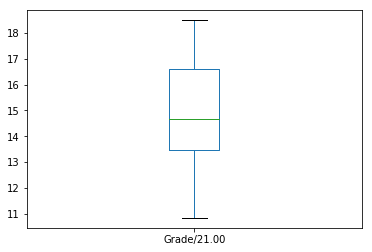

In [85]:
def Q8_function(file):
    
    """
    :type : String
    :rtype: Plot
    """
    
    df = Q3_function(filenames, file)
    Q8_plot = df[['Grade/21.00']].plot.box(return_type='axes')
    
    return Q8_plot

# Call the function. Plot will display.
Q8_function(file='Exceptions')

### Question 9: Return the number of rows and columns present in the 'Strings' dataset

* Use the `df.shape()` method.

In [86]:
def Q9_function(file):
    
    """
    :type : String
    :rtype: list
    """ 
    # TYPE YOUR CODE HERE
    df = Q3_function(Q1_function(), file)
    nrows, ncols = df.shape[:]
    return nrows, ncols

# Call the function and print the results
rows, columns = Q9_function (file='Strings')
print("Rows:",rows)
print("Columns:",columns)

Rows: 17
Columns: 7


### Question 10: Use the dataframe created in Question 6. Group the students based on their score in 'Q. 5 /12.00' column

* Which students scored 0 
* How many students achieved the maximum possible score
* Consider NA/missing values as 0

*Hint : Use groupby function.*


In [87]:
def Q10_function(df):
    
    """
    :type : DataFrame
    :rtype: list, int
    """ 
    df.replace('-', np.nan, inplace = True)
    df = df.apply(pd.to_numeric)
    df.fillna(0, inplace = True)
    groups = df.groupby("Q.5/12.00")
    zeros = list(map(lambda x: int(df.loc[x].id), groups.groups[0.0].tolist()))  # Select the id of corresp index
    mx = df["Q.5/12.00"].max()
    num = len(groups.groups[mx])
    return zeros, num

# Call the function and print the results
zeros, maximum = Q10_function(Q5_df)
print("Students scoring zero :",zeros)
print("Number of students with maximum score :",maximum)

Students scoring zero : [9, 10, 13, 17, 18]
Number of students with maximum score : 2


### Question 11: Find out who ('id') has scored the maximum combined score in the 'Tuples' and 'Taxonomy' quiz.

* Use the `pd.merge()` function.
* Call the function you wrote for Question 5 to convert time and remove spaces in columns (will be used in later questions).
* Create a new column 'Total_score' which is the sum of the scores of the two quizzes.

In [88]:
def Q11_function():
    
    """
    :type : None
    :rtype: Dataframe, int
    """ 
    _, df1 = Q5_function(Q3_function(filenames, s = "Tuples"))
    _, df2 = Q5_function(Q3_function(filenames, s = "Taxonomy"))
    df = pd.merge(df1, df2, how = 'inner', on = 'id')
    df['Total_score'] = df['Grade/20.00'] + df['Grade/21.00']
    max_scorer = df[df['Total_score'] == df['Total_score'].max()].id.item()
    return df, max_scorer

# Call the function and print the results. The DataFrame will be used in subsequent questions
Q11_df,max_scorer = Q11_function()
print("Max scorer :",max_scorer)

Max scorer : 10


### Question 12: Use the DataFrame generated in Question 11 and return the list of ids whose total time for both quizzes is less than than 20 minutes.

* Sort the list before returning.
* Can you code it in one line?

In [89]:
def Q12_function(df):
    
    """
    :type : DataFrame
    :rtype: list(int)
    """ 
    # TYPE YOUR CODE HERE
    new_df = df.time_x + df.time_y
    return sorted(list(df[df.time_x + df.time_y < 1200].id))
    
    # Call the function and print the results.
ids = Q12_function(Q11_df)
print("ID of students :",ids)

ID of students : [3, 4, 7, 8, 12, 18]


### Question 13: Discretize the column 'Grade/45.00' for the DataFrame generated in Question 6 and create a new column. Find the number of people (id) per bin. Return a DataFrame with only the bins and count per bin.

*Hints:* 
* _Use 'cut' and 'groupby'._
* _Include the overall average in the groupings._
* _You won't need to use 'drop' to drop columns. Use groupby and check the result._
* _Use 5 bins_
* Don't consider 'Overall Average' row.

In [90]:
def Q13_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """    
    # TYPE YOUR CODE HERE
    df = df[0:len(df) - 1]
    bins = pd.cut(df['Grade/45.00'], 5)
    grp = df.groupby(bins).groups
    vals = list(map(lambda x: [int(df.loc[index].id) for index in x], grp.values()))
    df = pd.DataFrame([vals]).T
    return df[0]

Q13_df = Q13_function(Q6_df)
print(Q13_df)

0           [15, 16, 17, 18]
1               [12, 13, 14]
2    [5, 6, 7, 8, 9, 10, 11]
3                     [3, 4]
4                  [0, 1, 2]
Name: 0, dtype: object


### INSTRUCTIONS: Complete unit testing for the remaining functions to check correctness of your code.

In [91]:
import unittest

class TestNotebook(unittest.TestCase):
    def test_Q01_function(self):
        
        ans = ['Python-QUIZ Coercion (6 min.)-grades.xlsx', 'Python-QUIZ Conditionals (6 min.)-grades.xlsx', 'Python-QUIZ Dictionaries (10 min.)-grades.xlsx', 'Python-QUIZ Exceptions (10 min.)-grades.xlsx', 'Python-QUIZ Functions (18 min.)-grades.xlsx', 'Python-QUIZ Iterations (6 min.)-grades.xlsx', 'Python-QUIZ Lists (10 min.)-grades.xlsx', 'Python-QUIZ Sets (7 min)-grades.xlsx', 'Python-QUIZ Strings (5 min.)-grades.xlsx', 'Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', 'Python-QUIZ Tuples (10 min.)-grades.xlsx']          
        result = Q1_function()
        res = list(map(lambda x: x.split("/")[-1], result))
        result = list(map(lambda x: x.split("\\")[-1], res))
        self.assertEqual(ans, result)
        
    def test_Q02_function(self):
        
        ans='Python-QUIZ Lists (10 min.)-grades.xlsx'
        
        result=Q2_function(filenames, s = "Lists")
        self.assertEqual(ans,result.split("/")[-1].split("\\")[-1])

    def test_Q03_function(self):
        
        fname = "data_raw\\Python-QUIZ Lists (10 min.)-grades.xlsx"
        df = pd.read_excel(fname)
        result = Q3_function(filenames, s = "Lists")
        
        self.assertEqual(list(df.columns.values), list(result.columns.values))
        
    def test_Q04_function(self):
        
        cols_ans=['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00',  'id']
        subset_cols_ans= ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
        top_ans=10
        
        cols_result,subset_result,top_result=Q4_function(functions_df)

        self.assertEqual(cols_ans,list(cols_result))
        self.assertEqual(subset_cols_ans,list(subset_result.columns))
        self.assertEqual(top_ans,len(top_result))
        
    def test_Q05_function(self):
        
        input_data = [
           [0, '14 mins 16 secs', 32, 5, 6, 6, '3.00', '12.00', '0.00'], 
           [1, np.nan, 31, 5, 8, 6, '-', '12.00', '0.00']
        ]
        
        expected = [
            [0, 32, 5, 6, 6, '3.00', '12.00', '0.00', 856],
            [1, 31, 5, 8, 6, '-', '12.00', '0.00', 0]
        ]
        ip_names = ['id', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 
                    'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00']
     
        op_names = ['id', 'Grade/45.00', 'Q.1/5.00', 'Q.2/10.00', 'Q.3/6.00', 
                     'Q.4/6.00', 'Q.5/12.00', 'Q.6/6.00', 'time']
        
        res_df = pd.DataFrame(data = input_data, columns = ip_names)
        res_type = res_df.dtypes.astype(str).tolist()
        ans_cols, ans_df = Q5_function(res_df)
        self.assertEqual(res_type, ans_cols) 
        self.assertEqual(op_names, ans_df.columns.tolist())
        expected_df = pd.DataFrame(data = expected, columns = op_names)
        self.assertTrue(expected_df.equals(ans_df))
        
    def test_Q06_function(self):
        
        cols = ['id', 'Grade/45.00', 'Q.1/5.00', 'Q.2/10.00', 'Q.3/6.00', 
                     'Q.4/6.00', 'Q.5/12.00', 'Q.6/6.00', 'time']
        ip = [
            [0, 32, 5, 6, 6, '3.00', '12.00', '0.00', 856],
            [1, 31, 5, 8, 6, '-', '10.00', '0.00', 0],
            [0, 32, 5, 6, 6, '3.00', '12.00', '0.00', 856],
        ]
        
        op = [
            [0, 32.0, 5.0, 6.0, 6.0, 3.0, 12.0, 0.0, 856.0],
            [1, 31.0, 5.0, 8.0, 6.0, 3.0, 10.0, 0.0, 0.0],
            [2, 31.5, 5.0, 7.0, 6.0, 3.0, 11.0, 0.0,428.0 ],
        ]
        
        ip_df = pd.DataFrame(data = ip, columns = cols)
        op_df = pd.DataFrame(data = op, columns = cols)
        actual = Q6_function(ip_df)
        self.assertTrue(op_df.equals(actual))    
        
    def test_Q07_function(self):
        
        ans=(14.83,2.19,13.46,14.66,16.62,18.5,10.83) 
        result=Q7_function(file="Exceptions")
        self.assertEqual(ans, result)

    def test_Q08_function(self):
        pass
    
    def test_Q09_function(self):
        
        rows = 17
        cols = 7
        self.assertEqual(rows, Q9_function('Strings')[0])
        self.assertEqual(cols, Q9_function('Strings')[1])
        
    def test_Q10_function(self):
        
        cols = ['id', 'Grade/45.00', 'Q.1/5.00', 'Q.2/10.00', 'Q.3/6.00', 'Q.4/6.00', 'Q.5/12.00', 'Q.6/6.00', 'time']
        data = [
            [ 0, 40, 4, 9, 5, 5.0, 12.0, 5.0, 856 ],
            [ 1, 33, 5, 10, 6, 6.0, 0.0, 6.0, 800 ],
            [ 3, 30, 4, 9, 5, 6.0, 0.0, 6.0, 900 ],
            [15, 45, 5, 10, 6, 6.0, 12.0, 6.0, 830]
        ]
        
        ip_df = pd.DataFrame(data = data, columns = cols)
        zeros = [1, 3]
        nums = 2
        self.assertEqual(zeros, Q10_function(ip_df)[0])
        self.assertEqual(nums, Q10_function(ip_df)[1])
    
    def test_Q11_function(self):
        
        df, id_ = Q11_function()
        mx = df[df.id == id_]
        self.assertEqual(mx['Total_score'].values, df['Total_score'].max())           
        
    def test_Q12_function(self):
        
        ans=[3, 4, 7, 8, 12, 18]   
        result = Q12_function(Q11_df)
        self.assertEqual(ans, result)
        
    def test_Q13_function(self):
        ans = [[15, 16, 17, 18], [12, 13, 14], [5, 6, 7, 8, 9, 10, 11], [3, 4], [0, 1, 2]]
        temp = Q13_function(Q6_df)
        result = [temp.iloc[x] for x in range(len(temp))]
        for x in range(len(ans)):
            self.assertEqual(sum(result[x]), sum(ans[x]))

        
unittest.main(argv=[''], verbosity=2, exit=False)

test_Q01_function (__main__.TestNotebook) ... ok
test_Q02_function (__main__.TestNotebook) ... ok
test_Q03_function (__main__.TestNotebook) ... ok
test_Q04_function (__main__.TestNotebook) ... ok
test_Q05_function (__main__.TestNotebook) ... ok
test_Q06_function (__main__.TestNotebook) ... ok
test_Q07_function (__main__.TestNotebook) ... ok
test_Q08_function (__main__.TestNotebook) ... ok
test_Q09_function (__main__.TestNotebook) ... ok
test_Q10_function (__main__.TestNotebook) ... ok
test_Q11_function (__main__.TestNotebook) ... ok
test_Q12_function (__main__.TestNotebook) ... ok
test_Q13_function (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 13 tests in 1.561s

OK
